# <p style="text-align: justify;"><div class="alert alert-info" role="alert">Multiple Linear Regression with physical predictors without Sumat predictor using Best Subset Selection</div></p>

## `Ana González Guerra` 

### ` Student of the master in Data Science at the University of Cantabria` 

## Index<a class="anchor" id="index"></a>
* [Loading data](#1)
    * [Physical predictors](#2)
    * [Target variables](#3)
* [Train/test partition](#4)
* [Multiple Linear Regression with Best Subset Selection](#5)
    * [Cross validation](#6)
* [References](#ref)
   

## Loading data <a class="anchor" id ="1" ></a>

* [Returning to the index of contents](#index)

### Physical predictors <a class="anchor" id="2"></a>

* [Returning to the index of contents](#index)

In [3]:
handle_physical <- read.csv('handle_physical_transformed_for_multiple_linear_regression.csv')
head(handle_physical)

W1Fc,W1Ox,W1Lac,W1tFc,W1tOx,W1tLac,W1tBorg,W1t5Fc,W1t5Ox,W1t5Lac,...,PlieguePec,PliegueAx,PliegueTri,PliegueSub,PliegueAbd,PliegueSup,tpcgrasa1,tpcgrasa2,PerCue,PerCin
0.09690101,-0.3612723,-0.2759823,-1.45702474,0.54870046,-1.5817296,-1.2280957,-3.38052307,-0.7215023,-2.7847814,...,-0.8757439,-0.8951047,1.0159821,-1.0183111,-1.2665456,-1.0811267,0.37659536,0.02830971,-2.2056212,-1.727334
-1.03822515,-0.6698591,1.5789808,-0.61695891,-1.07606258,0.2939295,-1.2280957,-2.55958657,0.2886009,-2.1390350,...,-1.0373448,-1.0624242,-0.8734794,-1.2829706,-1.3202312,-1.1361661,-0.43175736,0.03866565,-0.8281578,-1.462643
1.32283727,0.5644880,-1.0179676,-0.01024471,0.79866401,-1.1128148,0.8699011,0.01268113,0.2886009,-1.0493379,...,-1.1038863,-1.2619206,-1.1918942,-1.5390928,-1.4276024,-1.4113634,-0.86426995,0.23888577,-2.2056212,-1.674395
0.59635652,0.4101946,-0.3996465,-0.66362924,-1.82595321,0.2001465,-1.2280957,1.10726313,0.4329014,-0.7668239,...,-0.8472261,-0.6537784,0.3040546,-0.6255905,-0.6798385,-0.4595045,0.61849286,1.07832946,-0.9659042,-1.356766
-2.03713617,0.4101946,0.8369956,0.36311788,0.04877337,0.8566272,-0.1790973,-0.09677707,-1.0101032,-0.3228732,...,1.2440796,0.8038323,1.8540739,0.8855301,1.0917868,1.2013922,2.13407275,1.66913269,-1.5168895,-1.219127
-0.17552926,0.7187814,0.3423387,0.45645853,0.67368224,-0.3625512,0.8699011,-0.31569347,0.5772018,-0.9282605,...,-0.8092024,-0.8564925,0.4933012,-0.7963386,-1.1169928,-0.8577312,-0.07384767,0.33604799,-1.1036505,-1.303828


In [4]:
names(handle_physical)

[1] "W1Fc"       "W1Ox"       "W1Lac"      "W1tFc"      "W1tOx"     
 [6] "W1tLac"     "W1tBorg"    "W1t5Fc"     "W1t5Ox"     "W1t5Lac"   
[11] "W2tFc"      "W2tOx"      "W2tLac"     "W2tBorg"    "W2t5Fc"    
[16] "W2t5Ox"     "W2t5Lac"    "W2t10Fc"    "W2t10Ox"    "W2t10Lac"  
[21] "Sumat"      "Peso"       "Edad"       "Altura"     "PlieguePec"
[26] "PliegueAx"  "PliegueTri" "PliegueSub" "PliegueAbd" "PliegueSup"
[31] "tpcgrasa1"  "tpcgrasa2"  "PerCue"     "PerCin"

To avoid interference with the predictors related to FFM1 and similars, we eliminated the predictors that in their name contain the FM substring.

In [5]:
handle_physical <- handle_physical[!grepl('FM',names(handle_physical))] #eliminamos las variables que en su nombre contienen FM
names(handle_physical)

[1] "W1Fc"       "W1Ox"       "W1Lac"      "W1tFc"      "W1tOx"     
 [6] "W1tLac"     "W1tBorg"    "W1t5Fc"     "W1t5Ox"     "W1t5Lac"   
[11] "W2tFc"      "W2tOx"      "W2tLac"     "W2tBorg"    "W2t5Fc"    
[16] "W2t5Ox"     "W2t5Lac"    "W2t10Fc"    "W2t10Ox"    "W2t10Lac"  
[21] "Sumat"      "Peso"       "Edad"       "Altura"     "PlieguePec"
[26] "PliegueAx"  "PliegueTri" "PliegueSub" "PliegueAbd" "PliegueSup"
[31] "tpcgrasa1"  "tpcgrasa2"  "PerCue"     "PerCin"

We delete sumat.

In [6]:
handle_physical <- handle_physical[!grepl('Sumat', names(handle_physical))]
names(handle_physical)

[1] "W1Fc"       "W1Ox"       "W1Lac"      "W1tFc"      "W1tOx"     
 [6] "W1tLac"     "W1tBorg"    "W1t5Fc"     "W1t5Ox"     "W1t5Lac"   
[11] "W2tFc"      "W2tOx"      "W2tLac"     "W2tBorg"    "W2t5Fc"    
[16] "W2t5Ox"     "W2t5Lac"    "W2t10Fc"    "W2t10Ox"    "W2t10Lac"  
[21] "Peso"       "Edad"       "Altura"     "PlieguePec" "PliegueAx" 
[26] "PliegueTri" "PliegueSub" "PliegueAbd" "PliegueSup" "tpcgrasa1" 
[31] "tpcgrasa2"  "PerCue"     "PerCin"

### Target variables <a class="anchor" id="3"></a>

* [Returning to the index of contents](#index)

In [9]:
handle_target <- read.csv('handle_target_fusion_31_03_20.csv', row.name = 1)

head(handle_target)

,W1MaxWAbs,W1MaxWRel,W1maxRPM,W1MedWAbs,W1MedWRel,W1medRPM,W2MaxWAbs,W2MaxWRel,W2maxRPM,W2MedWAbs,...,W2DifWRelFFM1,W2DifWRelFFM2,W1.2MaxDifWAbs,W1.2MaxDifWRel,W1.2MaxDifWRelFFM1,W1.2MaxDifWRelFFM2,W1.2MedDifWAbs,W1.2MedDifWRel,W1.2MedDifWRelFFM1,W1.2MedDifWRelFFM2
0,398,8.747253,122,206,4.527473,100,397,8.725275,122,224,...,4.479981,4.544592,1,0.02197802,0.02589585,0.02626932,-18,-0.39560440,-0.46612522,-0.47284774
4,511,8.964912,128,294,5.157895,109,523,9.175439,122,295,...,4.552187,4.889881,-12,-0.21052632,-0.23958880,-0.25736216,-1,-0.01754386,-0.01996573,-0.02144685
7,524,10.174757,130,262,5.087379,107,476,9.242718,125,245,...,4.958966,5.566747,48,0.93203883,1.03043453,1.15672661,17,0.33009709,0.36494556,0.40967401
8,541,8.868852,128,351,5.754098,118,472,7.737705,130,333,...,2.792441,3.020719,69,1.13114754,1.38617564,1.49949379,18,0.29508197,0.36161104,0.39117229
9,547,9.596491,143,291,5.105263,116,169,2.964912,130,302,...,-3.215855,-3.248973,378,6.63157895,9.13979775,9.23392354,-11,-0.19298246,-0.26597295,-0.26871206
11,553,9.701754,133,365,6.403509,121,556,9.754386,136,355,...,4.113095,4.408965,-3,-0.05263158,-0.06138948,-0.06580544,10,0.17543860,0.20463161,0.21935148


In [10]:
rownames(handle_target) <- NULL

In [11]:
target <- handle_target['W1.2MedDifWRelFFM1']
head(target)

W1.2MedDifWRelFFM1
-0.46612522
-0.01996573
0.36494556
0.36161104
-0.26597295
0.20463161


We create the dataframe for the analysis:

In [12]:
data_physical <- cbind(target, handle_physical)

In [13]:
head(data_physical)

W1.2MedDifWRelFFM1,W1Fc,W1Ox,W1Lac,W1tFc,W1tOx,W1tLac,W1tBorg,W1t5Fc,W1t5Ox,...,PlieguePec,PliegueAx,PliegueTri,PliegueSub,PliegueAbd,PliegueSup,tpcgrasa1,tpcgrasa2,PerCue,PerCin
-0.46612522,0.09690101,-0.3612723,-0.2759823,-1.45702474,0.54870046,-1.5817296,-1.2280957,-3.38052307,-0.7215023,...,-0.8757439,-0.8951047,1.0159821,-1.0183111,-1.2665456,-1.0811267,0.37659536,0.02830971,-2.2056212,-1.727334
-0.01996573,-1.03822515,-0.6698591,1.5789808,-0.61695891,-1.07606258,0.2939295,-1.2280957,-2.55958657,0.2886009,...,-1.0373448,-1.0624242,-0.8734794,-1.2829706,-1.3202312,-1.1361661,-0.43175736,0.03866565,-0.8281578,-1.462643
0.36494556,1.32283727,0.5644880,-1.0179676,-0.01024471,0.79866401,-1.1128148,0.8699011,0.01268113,0.2886009,...,-1.1038863,-1.2619206,-1.1918942,-1.5390928,-1.4276024,-1.4113634,-0.86426995,0.23888577,-2.2056212,-1.674395
0.36161104,0.59635652,0.4101946,-0.3996465,-0.66362924,-1.82595321,0.2001465,-1.2280957,1.10726313,0.4329014,...,-0.8472261,-0.6537784,0.3040546,-0.6255905,-0.6798385,-0.4595045,0.61849286,1.07832946,-0.9659042,-1.356766
-0.26597295,-2.03713617,0.4101946,0.8369956,0.36311788,0.04877337,0.8566272,-0.1790973,-0.09677707,-1.0101032,...,1.2440796,0.8038323,1.8540739,0.8855301,1.0917868,1.2013922,2.13407275,1.66913269,-1.5168895,-1.219127
0.20463161,-0.17552926,0.7187814,0.3423387,0.45645853,0.67368224,-0.3625512,0.8699011,-0.31569347,0.5772018,...,-0.8092024,-0.8564925,0.4933012,-0.7963386,-1.1169928,-0.8577312,-0.07384767,0.33604799,-1.1036505,-1.303828


In [14]:
dim(data_physical)

[1] 82 34

## Train/test partition <a class="anchor" id ="4"></a>

* [Returning to the index of contents](#index)

Creating test subgroups using random sampling:

In [35]:
library(ISLR)
library(leaps)
set.seed(1)
group <- sample(rep(x = 1:7, length = nrow(data_physical))) 
table(group)

group
 1  2  3  4  5  6  7 
12 12 12 12 12 11 11 

A vector of maximum length 7 has been chosen because in the case of making a train/test 85/15 partition, the test set would have 12 elements; if we divide 82 / 12 it gives us approximately 7, which means that there are approximately 7 sets of 12 elements contained in the total set of observations (82). Then, repeating a vector of 1:7 along the length of the data in a random way we could obtain 7 test subgroups formed by 11 or 12 elements.

Let's see an example:

In [36]:
which(group == 2)

[1]  8 12 14 15 24 27 34 39 53 58 62 67

We are showing the test subgroup that would correspond to the positions in which a 2 was placed.

If we now use these positions to sample over the total observation set we would have the following:

In [37]:
data_physical[group == 2,]

,W1.2MedDifWRelFFM1,W1Fc,W1Ox,W1Lac,W1tFc,W1tOx,W1tLac,W1tBorg,W1t5Fc,W1t5Ox,...,PlieguePec,PliegueAx,PliegueTri,PliegueSub,PliegueAbd,PliegueSup,tpcgrasa1,tpcgrasa2,PerCue,PerCin
8,0.9576150,-1.0382251,-3.9100204,-1.3889602,0.3631179,0.79866401,-1.5817296,-1.2280957,-0.20623527,-2.0202064,...,-0.31489375,-0.8854516,-0.759330670,-0.82195077,-0.346220772,-0.5566330,-0.02452807,0.5949183,-2.067874858,-1.78027170
12,0.6362988,2.1855331,0.4101946,-0.6469749,0.9231618,0.17375515,2.2633715,0.8699011,0.66943033,0.5772018,...,0.63569973,2.3676266,3.530257526,1.67097136,0.884713673,0.7740270,2.58796484,1.7360663,-0.552665173,-0.66857027
14,0.4524906,-1.2198453,0.4101946,-1.1416318,-2.0170686,-2.20089853,1.2317590,-1.2280957,-0.53460987,0.4329014,...,-0.22934034,-0.7599619,0.268007680,-0.30970650,0.004653065,-0.4109403,0.96071656,0.7303007,-1.930128523,-1.72733354
15,0.4428954,1.0958120,0.7187814,1.0843240,0.9698321,0.79866401,0.8566272,0.8699011,1.87347053,0.2886009,...,-0.06773945,-0.1711258,0.673535975,-0.17310802,0.182965999,-0.2166833,0.75802453,1.4479816,-1.379143183,-0.61563211
24,0.9618578,-0.1301242,-2.0584997,-1.3889602,0.3631179,-0.20119017,0.2939295,0.8699011,-0.20623527,-1.4430046,...,-0.52402432,-0.4414113,-0.020367998,-0.43776757,-0.628070248,-0.3332375,0.35536251,1.7863198,-0.001679833,-0.50975578
27,0.2621954,-0.6749848,0.4101946,-0.2759823,0.4564585,-1.32602612,-0.5501171,-2.2770941,-0.09677707,-0.4329014,...,-0.53353026,-0.1711258,-1.011659387,-0.34385612,0.056421336,-0.2555347,-0.84404809,-1.3427991,0.549305507,-0.13918863
34,1.7819454,0.7779767,0.4101946,0.7133313,1.0165024,0.79866401,0.6690613,0.8699011,1.10726313,0.5772018,...,0.86384217,-0.3738399,0.213937240,1.16726449,0.407295173,0.4340774,0.18691392,-0.2955858,0.687051841,0.49606933
39,0.9870713,0.2331162,0.5644880,0.2186745,0.3164476,0.92364578,-0.1749853,-0.1790973,0.23159753,0.2886009,...,-0.46698871,0.2439554,-0.488978473,-0.23286986,-0.397989043,-0.3429503,-0.67350687,-0.5187898,-0.001679833,0.23137851
53,0.6770763,-0.6295797,-0.5155657,-1.0179676,0.3631179,-1.07606258,0.6690613,0.8699011,0.55997213,0.2886009,...,-0.60957773,-0.4124521,-0.362814114,0.15985075,-0.737358820,-0.5274944,-0.75749532,-0.7893516,-0.001679833,0.01962586
58,0.8644917,0.6417616,-0.2069789,-0.3996465,0.1297663,0.79866401,-0.9252489,-1.2280957,0.39578483,0.4329014,...,0.54064039,0.6107713,-0.002344518,0.16838816,0.769673071,0.7934527,0.21634631,-0.1346308,0.962544511,1.07838913


## Mulitple Linear Regression with Best Subset Selection <a class="anchor" id="6"></a>

* [Returning to the index of contents](#index)

For the R function that allows to apply the Best Subset Selection model, regsubsets(), the predict() function does not work, that is why we need to create our own function [[1]](#james2013).

In [19]:
predict.regsubsets  <- function(object, newdata, id, ...){
    form <- as.formula(object$call[[2]])#we extract the regression formula
    mat <- model.matrix(form, newdata)
    coefi <- coef(object , id = id)
    xvars <- names(coefi) #we store the preditors names
    mat[ , xvars] %*% coefi
}

### Cross validation  [[2]](#rodrigo2016): <a class="anchor" id="7"></a>

* [Returning to the index of contents](#index)

In [55]:
error_matrix <- matrix(data = NA, nrow = 7, ncol = 33,
                       dimnames = list(NULL, c(1:33)))
num_validations <- 7
num_predictors <- 33

for (k in 1:num_validations) {
    train <- data_physical[group != k, ]
    best_models <- regsubsets(W1.2MedDifWRelFFM1~., data = train, nvmax = 33,
                                  method = "exhaustive")
    for (i in 1:num_predictors) {
        test <- data_physical[group == k, ]
        predictions <- predict.regsubsets(object = best_models,
                                           newdata = test, id = i)
        error_matrix[k,i] <- sqrt(mean((test$W1.2MedDifWRelFFM1 - predictions)^2))
        }
}

Now we can see the evolution of the RMSE error based on the number of predictors:

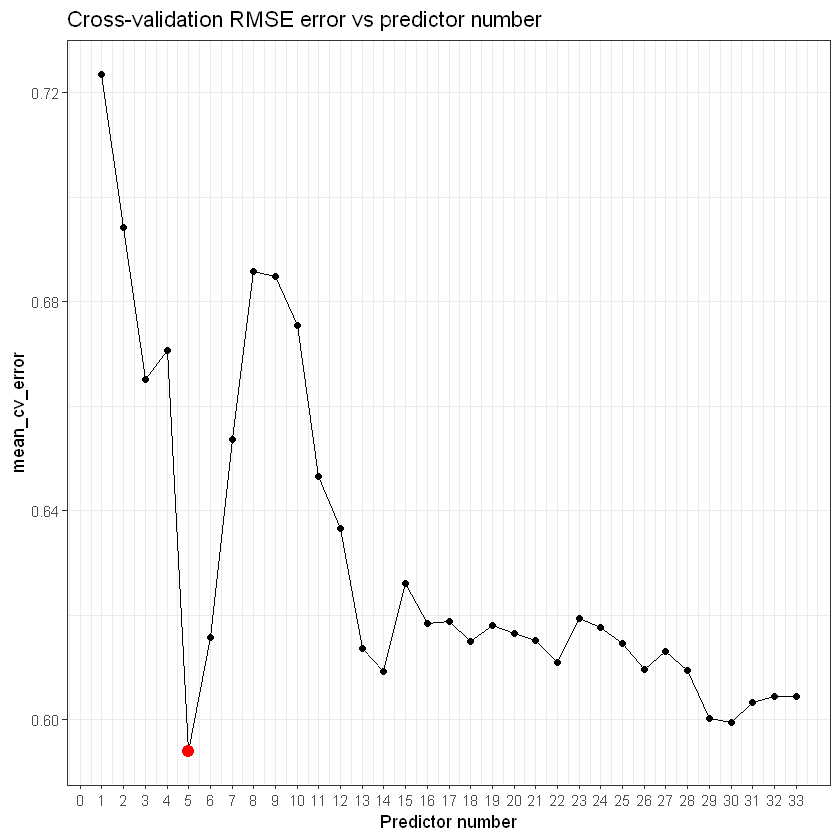

In [52]:
library(caret)
ggplot(data = data.frame(n_predictores = 1:33, mean_cv_error = mean_cv_error),
       aes(x = n_predictores, y = mean_cv_error)) +
  geom_line() +
  geom_point() +
  geom_point(aes(x = n_predictores[which.min(mean_cv_error)],
                 y = mean_cv_error[which.min(mean_cv_error)]),
             colour = "red", size = 3) +
  scale_x_continuous(breaks = c(0:33)) +
  theme_bw() +
  labs(title = "Cross-validation RMSE error vs predictor number",
       x = "Predictor number")

As we can see in the plot, the minimum RMSE is for the model with 5 predictors:

In [39]:
mean_cv_error <- apply(X = error_matrix, MARGIN = 2, FUN = mean)
which.min(x = mean_cv_error)

5 
5

In [54]:
mean_cv_error[which.min(x = mean_cv_error)[1]]

5 
0.5938731

The coefficients associated to this model are:

In [48]:
full_model <- regsubsets(W1.2MedDifWRelFFM1~., data = data_physical, nvmax = 33)
coef(object = full_model, 5)

(Intercept)        W1Ox       W1Lac     W2t10Fc  PliegueAbd      PerCue 
  1.0900772  -0.2075881   0.2068790   0.2441513   0.2306521   0.3595814

In [50]:
print(paste('The adjusted R squared is:',summary(full_model)$adjr2[5]))

[1] "The adjusted R squared is: 0.55897049373082"


Regarding to the BIC value in the next plot we can see the evolution:

(For being able to display all the predictors names some adjustments were needed [[2]](#stackoverflow))

In [80]:
plot.regsubsets2 <- 
function (x, labels = obj$xnames, main = NULL, scale = c("bic", 
    "Cp", "adjr2", "r2"), col = gray(seq(0, 0.9, length = 10)), 
    ...) 
{
    obj <- x
    lsum <- summary(obj)
    par(mar = c(7, 5, 6, 3) + 0.1)
    nmodels <- length(lsum$rsq)
    np <- obj$np
    propscale <- FALSE
    sscale <- pmatch(scale[1], c("bic", "Cp", "adjr2", "r2"), 
        nomatch = 0)
    if (sscale == 0) 
        stop(paste("Unrecognised scale=", scale))
    if (propscale) 
        stop(paste("Proportional scaling only for probabilities"))
    yscale <- switch(sscale, lsum$bic, lsum$cp, lsum$adjr2, lsum$rsq)
    up <- switch(sscale, -1, -1, 1, 1)
    index <- order(yscale * up)
    colorscale <- switch(sscale, yscale, yscale, -log(pmax(yscale, 
        1e-04)), -log(pmax(yscale, 1e-04)))
    image(z = t(ifelse(lsum$which[index, ], colorscale[index], 
        NA + max(colorscale) * 1.5)), xaxt = "n", yaxt = "n", 
        x = (1:np), y = 1:nmodels, xlab = "", ylab = scale[1], 
        col = col)
    laspar <- par("las")
    on.exit(par(las = laspar))
    par(las = 2)
    axis(1, at = 1:np, labels = labels, ...) # I modified this line
    axis(2, at = 1:nmodels, labels = signif(yscale[index], 2))
    if (!is.null(main)) 
        title(main = main)
    box()
    invisible(NULL)
}

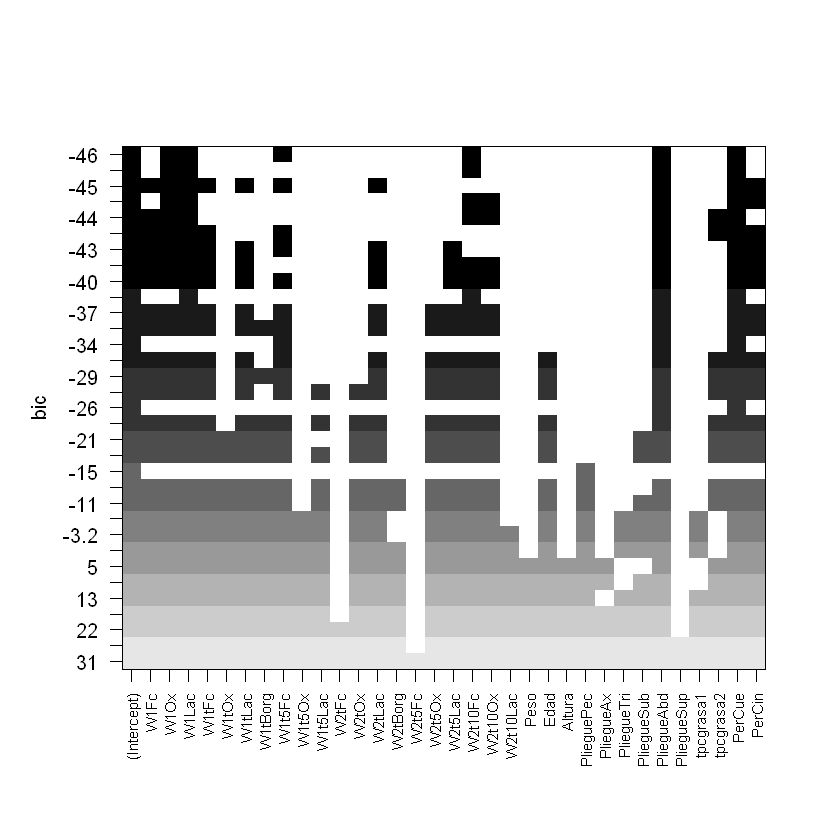

In [81]:
plot.regsubsets2(modelo_final, cex.axis = 0.75)


This plot shows the importance of the predictors in the model by the color of squares, the darker is the color the more important the predictor.

In [49]:
print(paste('The BIC value is:',summary(full_model)$bic[5]))

[1] "The BIC value is: -45.9131481430341"


The value of the BIC is quite low, being very close to the minimum value (-46, optimum value), so this model, compared to the rest of the possible ones, is the one with the lowest tendency to commit errors in the test.

## References <a class="anchor" id="ref"></a>

* [Returning to the index of contents](#index)

[1] James, G., Witten, D., Hastie, T. and Tibshirani, R. (2013) "Linear model selection and regularization", in James, G., Witten, D., Hastie, T., and Tibshirani, R. (eds.) An introduction to statistical learning with applications in R. Springer Science+Business Media, pp. 203–264. doi:https://doi.org/10.1007/978-1-4614-7138-7.<a class="anchor" id="james2013"></a>

[2] Rodrigo, J. A. (2016) Selección de predictores y mejor modelo lineal múltiple: subset selection, ridge regression, lasso regression y dimension reduction. Available at: https://rpubs.com/Joaquin_AR/242707 (Accessed: May 3, 2020).<a class="anchor" id="rodrigo2016"></a>

[2] stackoverflow (2014) Cannot change text size in regsubsets plot. Available at: https://stackoverflow.com/questions/21708764/cannot-change-text-size-in-regsubsets-plot (Accessed: May 3, 2020).<a class="anchor" id="stackoverflow2014"></a>